In [1]:
from qiskit import *


In [2]:
circuit = QuantumCircuit(2,2)

In [3]:
#quantum_register = QuantumRegister(2)
#classical_register = ClassicalRegister(2)
#circuit = QuantumCircuit(quantum_register,classical_register)

In [4]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [5]:
%matplotlib inline

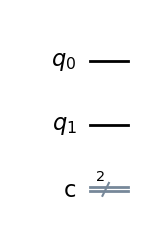

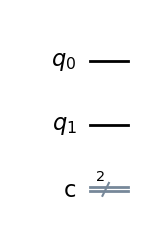

In [6]:
circuit.draw(output='mpl')

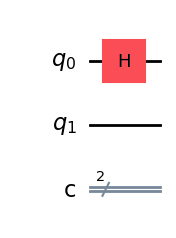

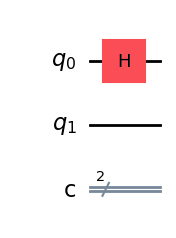

In [7]:
circuit.h(0)
circuit.draw(output='mpl')

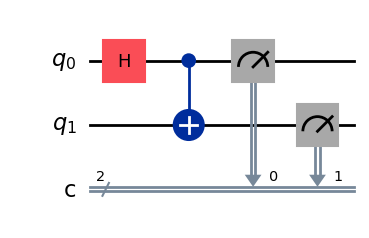

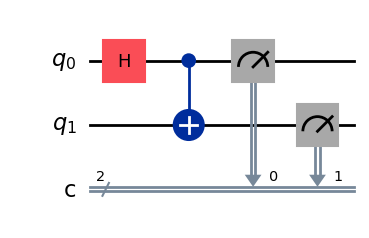

In [8]:
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [9]:
from qiskit.visualization import plot_histogram

Run using AER Simulator

In [10]:
from qiskit_aer import *
aer_sim = Aer.get_backend('qasm_simulator')

ImportError: /home/coder/project/.qcvenv/lib/python3.12/site-packages/qiskit_aer/backends/controller_wrappers.cpython-312-aarch64-linux-gnu.so: undefined symbol: omp_get_num_threads

In [ ]:
aer_sim_circuit = transpile(circuit, backend=aer_sim)
aer_sim_circuit.draw(output="mpl")

In [11]:
aer_sim_result = aer_sim.run(aer_sim_circuit).result()

In [ ]:
plot_histogram(aer_sim_result.get_counts(circuit))

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


Run using Qiskit Runtime local testing mode

In [12]:
# Define a local backend
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
runtime_sim = FakeManilaV2()

/home/coder/project/.qcvenv/lib/python3.12/site-packages/qiskit/utils/lazy_tester.py:321: OptionalDependencyImportWarning: While trying to import 'Qiskit Aer', some components were located but raised other errors during import. You might have an incompatible version installed. Qiskit will continue as if the optional is not available.
 - module 'qiskit_aer' failed to import with: ImportError('/home/coder/project/.qcvenv/lib/python3.12/site-packages/qiskit_aer/backends/controller_wrappers.cpython-312-aarch64-linux-gnu.so: undefined symbol: omp_get_num_threads')
  warnings.warn(message, category=OptionalDependencyImportWarning)


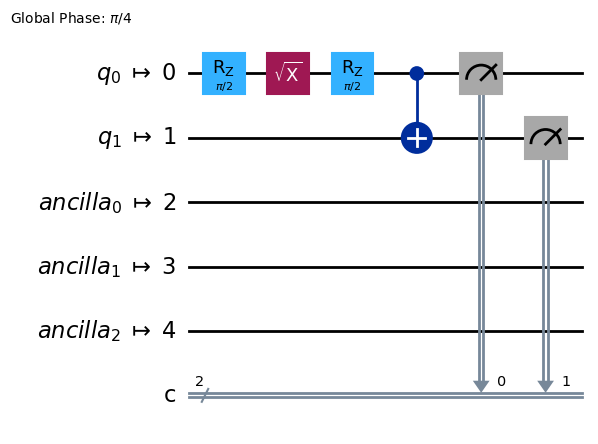

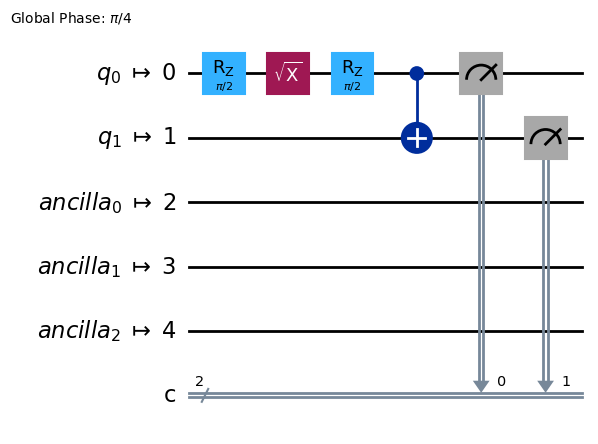

In [13]:
runtime_sim_pm = generate_preset_pass_manager(backend=runtime_sim, optimization_level=1)
runtime_sim_isa_circuit = runtime_sim_pm.run(circuit)
runtime_sim_isa_circuit.draw(output="mpl")

In [19]:
runtime_sim_sampler = Sampler(runtime_sim)
runtime_sim_job = runtime_sim_sampler.run([runtime_sim_isa_circuit])

/home/coder/project/.qcvenv/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/fake_backend.py:468: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


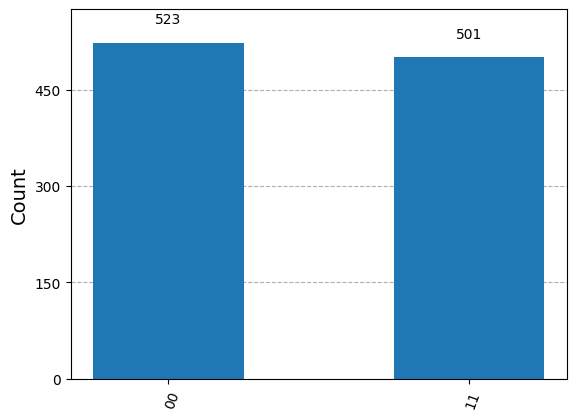

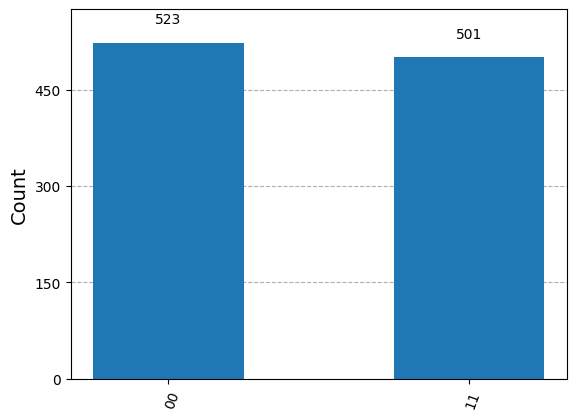

In [20]:
runtime_sim_result = runtime_sim_job.result()
plot_histogram(runtime_sim_result[0].data.c.get_counts())

Run on real IBM quantum computer

In [20]:
service = QiskitRuntimeService(channel="ibm_quantum", instance="ibm-q/open/main")

In [21]:
quantum_computer = service.backend("ibm_sherbrooke", instance="ibm-q/open/main")

In [22]:
pm = generate_preset_pass_manager(backend=quantum_computer, optimization_level=1)
isa_circuit = pm.run(circuit)
isa_circuit.draw(output="mpl")

In [ ]:
sampler = Sampler(quantum_computer)
job = sampler.run([isa_circuit])

In [ ]:
quantum_result = job.result()
plot_histogram(quantum_result[0].data.c.get_counts())